In [1]:
import numpy as np
import pandas as pd
import statistics as stat

from lifelines import KaplanMeierFitter

from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['mathtext.default'] = 'regular'
plt.rcParams.update({'font.size':22})
plt.rc({'xtick':22})
plt.rc({'ytick':22})

In [2]:
# Defining functions for plotting
def plot_KM(df, max_rhorvir, ion, plot_quantity, label, c, ax, column_density=False, want_abs_val=False):
    # Create semi-transparent Kaplan Meier object
    kmf = KaplanMeierFitter(alpha=0.32)

    # Select galaxies within rho/rvir limit
    df = df[df['rho_rvir'] < max_rhorvir]
    X = [] # List of col densities
    Y = [] # List of (non)detections, 0 for nondetect, 1 for detect
    
    # Iterate over your dataframe
    for index, irow in df.iterrows():
        # Skip row if both column density and its threshold are NaN
        if (np.isnan(irow[ion+'_log10_N_det_thresh']) and np.isnan(irow[ion+'_total_log10_N'])):
            pass
        # If the column density is greater than the corresponding threshold, then it's a detection
        elif irow[ion+'_total_log10_N'] > irow[ion+'_log10_N_det_thresh']:
            # want_abs_val should be given as true if you want to plot the absolute value of a quantity
            # instead of the actual amount
            if not(want_abs_val):
                X.append(irow[plot_quantity])
            else:
                X.append(np.abs(irow[plot_quantity]))
            Y.append(1)
        # Otherwise, this row contains a non-detection
        else:
            # Checks if the quantity you want to plot is column density, otherwise skip
            if column_density:
                X.append(irow[ion+'_log10_N_det_thresh'])
                Y.append(0)
            else:
                pass

    # Calculates the Kaplan-Meier curve
    kmf.fit_left_censoring(X, event_observed=Y, label=label)
    # Plots the Kaplan-Meier curve on axis ax with color c
    kmf.plot(ax=ax, color=c)

In [3]:
# Read in your data here
galfit = pd.read_csv('../tables/galfit_spectral_refined_table_for_kirill_w_bval_3.csv')
galfit

,gal_num,id,QSO,mstars,SFR,sSFR,galaxy_RA,galaxy_DEC,redshift,xcoord,...,N_H_I_components,N_O_VI_components,v_span_HI,v_span_OVI,sqrt_M_tot_HI,sqrt_M_tot_OVI,mu_vcen_HI,mu_vcen_OVI,sqrt_V_HI,sqrt_V_OVI
0,6,J022614.58+001351.4._03,J0226+0015,8.712370,-0.479859,-9.192229,36.560749,0.230950,0.292878,2123.84,...,1,0,63.081353,0.0,89.390330,NaN,-86.563410,NaN,22.302626,NaN
1,7,J022617.99+001447.5._02,J0226+0015,10.088364,-1.276418,-11.364781,36.574951,0.246520,0.297620,2167.89,...,2,0,568.990164,0.0,266.866334,NaN,230.298572,NaN,134.834003,NaN
2,11,J022610.26+001603.7._01,J0226+0015,9.072694,-0.245674,-9.318368,36.542740,0.267700,0.334506,3866.47,...,1,0,78.343794,0.0,201.478592,NaN,-199.565539,NaN,27.698714,NaN
3,14,J022612.18+001506.0._01,J0226+0015,9.635416,0.425030,-9.210385,36.550751,0.251680,0.349424,3101.92,...,1,0,27.575219,0.0,217.474082,NaN,217.255442,NaN,9.749312,NaN
4,17,J022614.39+001620.4._02,J0226+0015,9.280871,0.119532,-9.161338,36.559978,0.272330,0.361854,3465.55,...,0,0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2232,J155505.87+362916.1._11,J1555+3628,8.783799,-0.552538,-9.336336,238.774445,36.487801,0.234935,1485.85,...,1,0,84.755108,0.0,37.848955,NaN,23.121739,NaN,29.965456,NaN
204,2239,J155501.61+362959.5._12,J1555+3628,9.844664,0.647039,-9.197625,238.756729,36.499851,0.433378,1938.21,...,0,0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
205,2244,J155459.42+362756.5._11,J1555+3628,9.977760,0.903555,-9.074205,238.747574,36.465691,0.473347,1674.87,...,0,0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
206,2273,J234458.58-010132.3._04,J2345-0059,8.180367,-0.987021,-9.167389,356.244080,-1.025630,0.058820,4398.18,...,0,0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Applying some filters for our data
HI_chosen_threshold = 13.5
galfit_HI = galfit[galfit['H_I_log10_N_det_thresh'] < HI_chosen_threshold]

OVI_chosen_threshold = 13.5
galfit_OVI = galfit[galfit['O_VI_log10_N_det_thresh'] < OVI_chosen_threshold]

# Making polar-disk split KM plots of $\sqrt{M}$

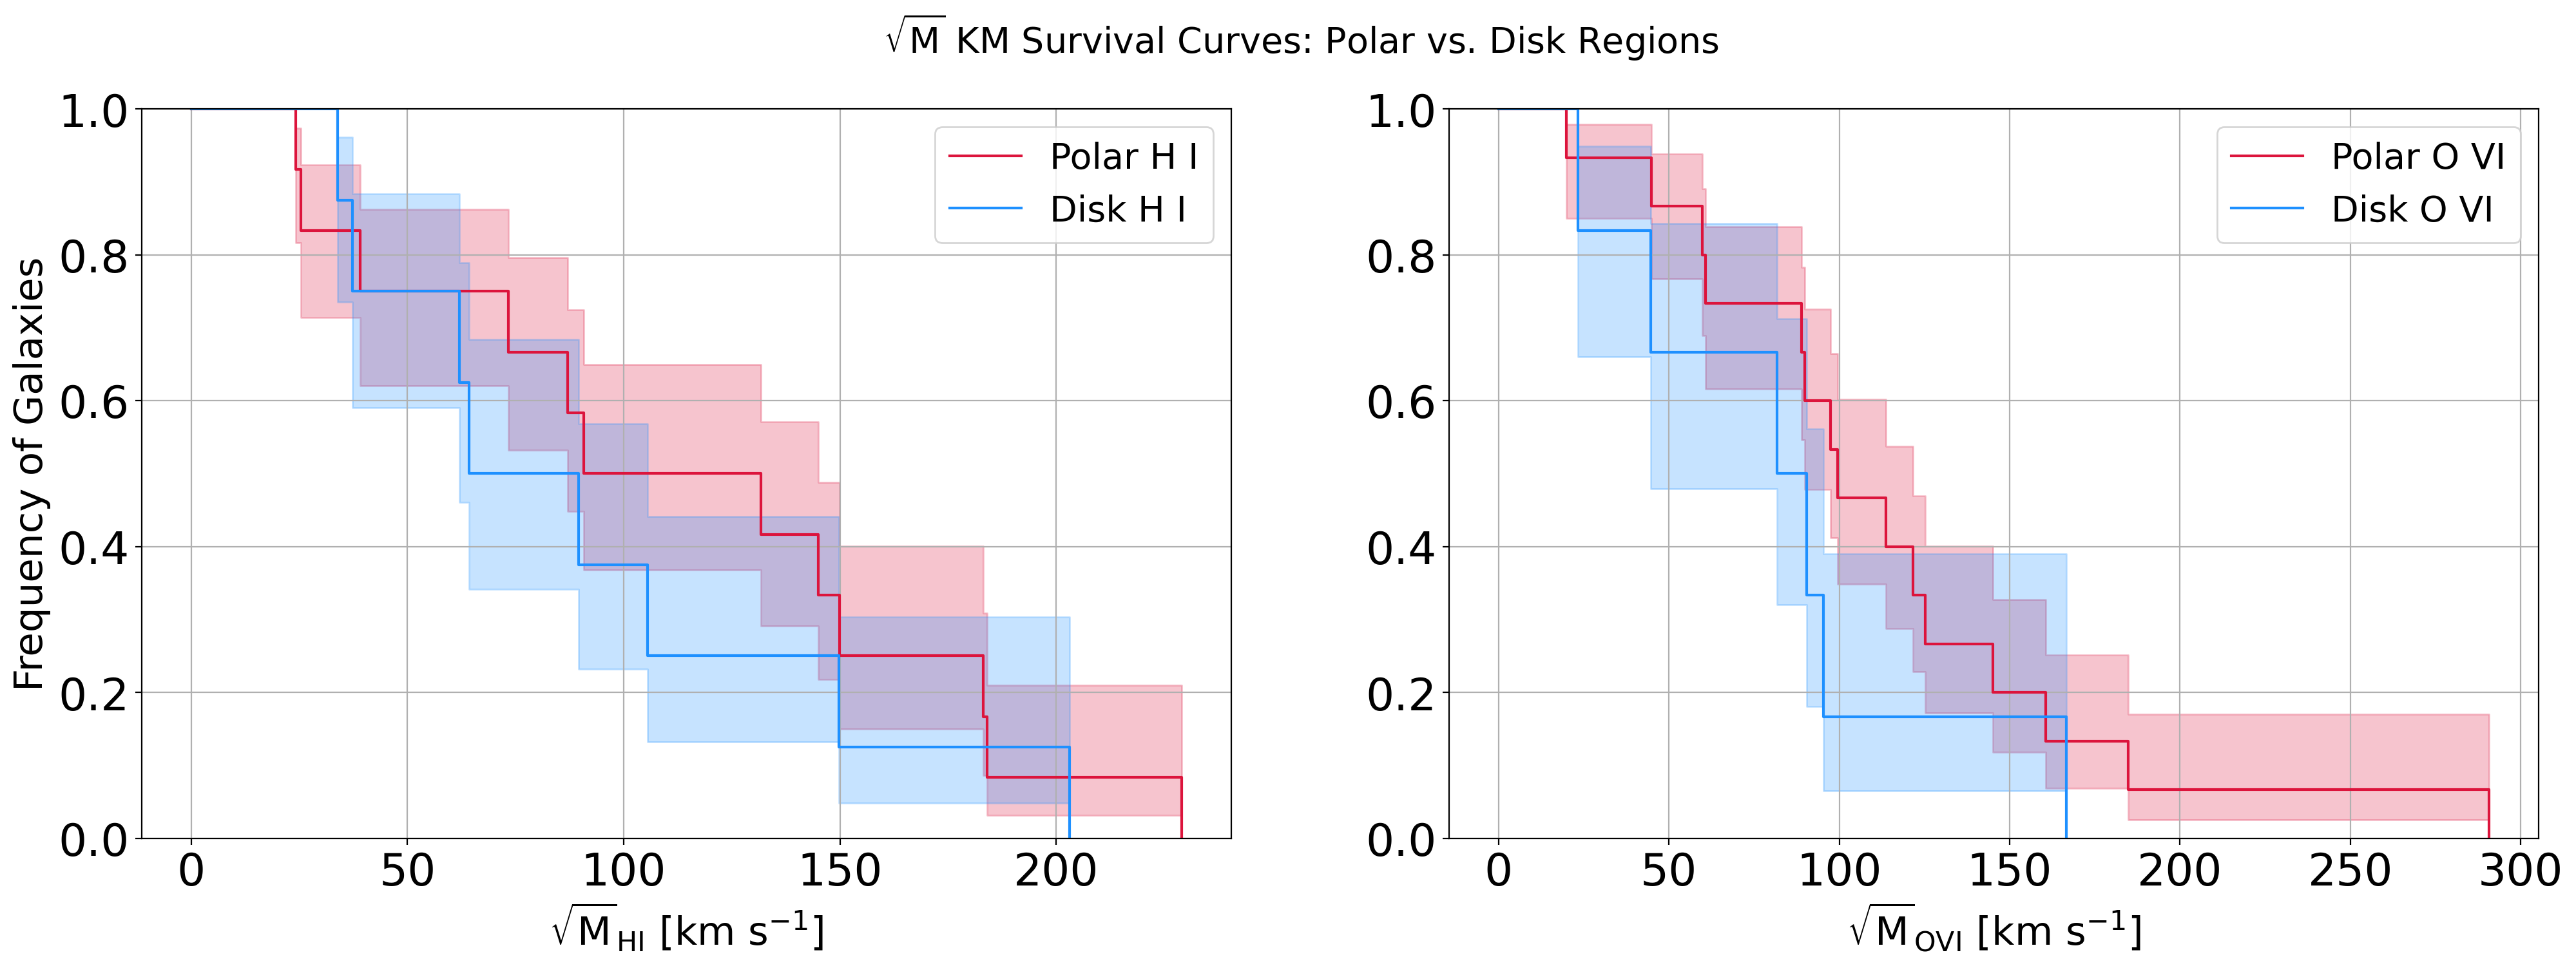

In [5]:
# Create the figure
fig1,ax = plt.subplots(1,2, dpi=200)
fig1.set_size_inches(24,7.5)
fig1.patch.set_facecolor('white')

# Kaplan Meier plot - HI
# Making/plotting a KM curve for pole region data points (\phi < 45 degrees)
galfit_HI_pole = galfit_HI[galfit_HI['azimuthal_angle'] < 45]
plot_KM(df=galfit_HI_pole, max_rhorvir=1, ion='H_I', plot_quantity='sqrt_M_tot_HI', label='Polar H I',
            c='crimson', ax=ax[0], column_density=False)

# Making/plotting a KM curve for disk region data points (\phi > 45 degrees)
galfit_HI_disk = galfit_HI[galfit_HI['azimuthal_angle'] > 45]
plot_KM(df=galfit_HI_disk, max_rhorvir=1, ion='H_I', plot_quantity='sqrt_M_tot_HI', label='Disk H I',
            c='dodgerblue', ax=ax[0], column_density=False)

ax[0].set_ylim(ymin=0, ymax=1)
ax[0].set_xlabel(r'$\sqrt{M}_{H I}$ [km s$^{-1}$]')
ax[0].set_ylabel("Frequency of Galaxies")
ax[0].grid()
ax[0].legend(fontsize=20)
ax[0].tick_params(axis='x', labelsize=25)
ax[0].tick_params(axis='y', labelsize=25)


# Kaplan Meier plot - OVI
# Making/plotting a KM curve for pole region data points (\phi < 45 degrees)
galfit_OVI_pole = galfit_OVI[galfit_OVI['azimuthal_angle'] < 45]
plot_KM(df=galfit_OVI_pole, max_rhorvir=1, ion='O_VI', plot_quantity='sqrt_M_tot_OVI', label='Polar O VI',
            c='crimson', ax=ax[1], column_density=False)

# Making/plotting a KM curve for disk region data points (\phi > 45 degrees)
galfit_OVI_disk = galfit_OVI[galfit_OVI['azimuthal_angle'] > 45]
plot_KM(df=galfit_OVI_disk, max_rhorvir=1, ion='O_VI', plot_quantity='sqrt_M_tot_OVI', label='Disk O VI',
            c='dodgerblue', ax=ax[1], column_density=False)

ax[1].set_xlabel(r'$\sqrt{M}_{O VI}$ [km s$^{-1}$]')
ax[1].set_ylim(ymin=0, ymax=1)
ax[1].grid()
ax[1].legend(fontsize=20)
ax[1].tick_params(axis='x', labelsize=25)
ax[1].tick_params(axis='y', labelsize=25);
plt.suptitle(r"$\sqrt{M}$ KM Survival Curves: Polar vs. Disk Regions", size=20);

In [6]:
# Save your figure at the given path with the given name
fig1.savefig('./sqrtM_KM_plots.png', bbox_inches='tight')